## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], regular = l1, regular_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=regular(regular_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=regular(regular_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
REGULAR = [l1, l2 , l1_l2]
REG = ['l1', 'l2' , 'l1_l2']
L_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for rg, reg in zip(REGULAR, REG):
    for le in L_EXP:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with RG = %s, LE = %s" % (reg, str(le)))
        model = build_mlp(input_shape=x_train.shape[1:], regular = rg, regular_ratio = le)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-rg-%s-le-%s" % (reg, str(le))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


Experiment with RG = l1, LE = 0.01
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 101us/step - loss: 6.0090 - acc: 0.2698 - val_loss: 5.8103 - val_acc: 0.3391
Epoch 2/50
50000/50000 [==============================] - 5s 91us/step - loss: 5.7258 - acc: 0.3625 - val_loss: 5.6455 - val_acc: 0.3788
Epoch 3/50
50000/50000 [==============================] - 5s 91us/step - loss: 5.5813 - acc: 0.3916 - val_loss: 5.5143 - val_acc: 0.4023
Epoch 4/50
50000/50000 [==============================] - 5s 92us/step - loss: 5.4599 - acc: 0.4121 - val_loss: 5.4078 - val_acc: 0.4138
Epoch 5/50
50000/50000 [==============================] - 5s 92us/step - loss: 5.3490 - acc: 0.4267 - val_loss: 5.2962 - val_acc: 0.4381
Epoch 6/50
50000/50000 [==============================] - 5s 91us/step - loss: 5.2461 - acc: 0.4421 - val_loss: 5.2039 - val_acc: 0.4460
Epoch 7/50
50000/50000 [==============================] - 5s 92us/step - loss: 5.1496 - acc: 0.4549 - val_loss: 5.1255 - val_ac

50000/50000 [==============================] - 5s 92us/step - loss: 1.8286 - acc: 0.3578 - val_loss: 1.7744 - val_acc: 0.3768
Epoch 3/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.7397 - acc: 0.3918 - val_loss: 1.7087 - val_acc: 0.4022
Epoch 4/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.6778 - acc: 0.4140 - val_loss: 1.6633 - val_acc: 0.4167
Epoch 5/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.6300 - acc: 0.4283 - val_loss: 1.6123 - val_acc: 0.4347
Epoch 6/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.5865 - acc: 0.4434 - val_loss: 1.5819 - val_acc: 0.4433
Epoch 7/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.5521 - acc: 0.4566 - val_loss: 1.5622 - val_acc: 0.4392
Epoch 8/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.5221 - acc: 0.4675 - val_loss: 1.5369 - val_acc: 0.4567
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 5s 94us/step - loss: 1.7147 - acc: 0.3979 - val_loss: 1.6812 - val_acc: 0.4170
Epoch 4/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.6561 - acc: 0.4207 - val_loss: 1.6383 - val_acc: 0.4230
Epoch 5/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.6092 - acc: 0.4356 - val_loss: 1.5998 - val_acc: 0.4366
Epoch 6/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.5712 - acc: 0.4485 - val_loss: 1.5644 - val_acc: 0.4485
Epoch 7/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.5348 - acc: 0.4627 - val_loss: 1.5476 - val_acc: 0.4514
Epoch 8/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.5058 - acc: 0.4719 - val_loss: 1.5224 - val_acc: 0.4604
Epoch 9/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.4789 - acc: 0.4804 - val_loss: 1.4997 - val_acc: 0.4670
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 5s 91us/step - loss: 9.9199 - acc: 0.3980 - val_loss: 9.2840 - val_acc: 0.4039
Epoch 5/50
50000/50000 [==============================] - 5s 91us/step - loss: 8.7221 - acc: 0.4049 - val_loss: 8.1910 - val_acc: 0.4034
Epoch 6/50
50000/50000 [==============================] - 5s 92us/step - loss: 7.7026 - acc: 0.4118 - val_loss: 7.2556 - val_acc: 0.4102
Epoch 7/50
50000/50000 [==============================] - 5s 91us/step - loss: 6.8326 - acc: 0.4204 - val_loss: 6.4381 - val_acc: 0.4228
Epoch 8/50
50000/50000 [==============================] - 5s 90us/step - loss: 6.0887 - acc: 0.4263 - val_loss: 5.7539 - val_acc: 0.4297
Epoch 9/50
50000/50000 [==============================] - 5s 90us/step - loss: 5.4522 - acc: 0.4324 - val_loss: 5.1724 - val_acc: 0.4256
Epoch 10/50
50000/50000 [==============================] - 5s 90us/step - loss: 4.9104 - acc: 0.4390 - val_loss: 4.6662 - val_acc: 0.4351
Epoch 11/50
50000/50000 [==========================

50000/50000 [==============================] - 5s 94us/step - loss: 1.7546 - acc: 0.4327 - val_loss: 1.7501 - val_acc: 0.4365
Epoch 6/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.7133 - acc: 0.4475 - val_loss: 1.7163 - val_acc: 0.4490
Epoch 7/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.6775 - acc: 0.4595 - val_loss: 1.6789 - val_acc: 0.4529
Epoch 8/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.6448 - acc: 0.4720 - val_loss: 1.6773 - val_acc: 0.4550
Epoch 9/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.6161 - acc: 0.4807 - val_loss: 1.6300 - val_acc: 0.4735
Epoch 10/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.5880 - acc: 0.4916 - val_loss: 1.6219 - val_acc: 0.4707
Epoch 11/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.5636 - acc: 0.5002 - val_loss: 1.6169 - val_acc: 0.4729
Epoch 12/50
50000/50000 [=========================

50000/50000 [==============================] - 5s 91us/step - loss: 1.5696 - acc: 0.4487 - val_loss: 1.5744 - val_acc: 0.4547
Epoch 7/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.5360 - acc: 0.4623 - val_loss: 1.5567 - val_acc: 0.4499
Epoch 8/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.5076 - acc: 0.4712 - val_loss: 1.5278 - val_acc: 0.4639
Epoch 9/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.4809 - acc: 0.4794 - val_loss: 1.5040 - val_acc: 0.4721
Epoch 10/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.4559 - acc: 0.4892 - val_loss: 1.4940 - val_acc: 0.4673
Epoch 11/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.4345 - acc: 0.4971 - val_loss: 1.4624 - val_acc: 0.4826
Epoch 12/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.4097 - acc: 0.5037 - val_loss: 1.4677 - val_acc: 0.4758
Epoch 13/50
50000/50000 [========================

50000/50000 [==============================] - 5s 92us/step - loss: 1.5463 - acc: 0.4590 - val_loss: 1.5521 - val_acc: 0.4500
Epoch 8/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.5160 - acc: 0.4691 - val_loss: 1.5350 - val_acc: 0.4530
Epoch 9/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.4870 - acc: 0.4780 - val_loss: 1.5069 - val_acc: 0.4668
Epoch 10/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.4625 - acc: 0.4859 - val_loss: 1.5046 - val_acc: 0.4630
Epoch 11/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.4392 - acc: 0.4941 - val_loss: 1.4817 - val_acc: 0.4711
Epoch 12/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.4161 - acc: 0.5017 - val_loss: 1.4654 - val_acc: 0.4774
Epoch 13/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.3963 - acc: 0.5105 - val_loss: 1.4401 - val_acc: 0.4877
Epoch 14/50
50000/50000 [=======================

50000/50000 [==============================] - 5s 105us/step - loss: 2.4623 - acc: 0.0972 - val_loss: 2.4623 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.4623 - acc: 0.0966 - val_loss: 2.4621 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.4622 - acc: 0.0978 - val_loss: 2.4622 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 5s 106us/step - loss: 2.4622 - acc: 0.0980 - val_loss: 2.4621 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 5s 104us/step - loss: 2.4621 - acc: 0.0984 - val_loss: 2.4620 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 5s 106us/step - loss: 2.4621 - acc: 0.0954 - val_loss: 2.4621 - val_acc: 0.1000
Epoch 14/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.4621 - acc: 0.0984 - val_loss: 2.4620 - val_acc: 0.1000
Epoch 15/50
50000/50000 [===============

50000/50000 [==============================] - 5s 105us/step - loss: 6.2701 - acc: 0.4277 - val_loss: 5.8960 - val_acc: 0.4243
Epoch 10/50
50000/50000 [==============================] - 5s 105us/step - loss: 5.5660 - acc: 0.4296 - val_loss: 5.2498 - val_acc: 0.4304
Epoch 11/50
50000/50000 [==============================] - 5s 105us/step - loss: 4.9652 - acc: 0.4352 - val_loss: 4.6990 - val_acc: 0.4318
Epoch 12/50
50000/50000 [==============================] - 5s 105us/step - loss: 4.4552 - acc: 0.4371 - val_loss: 4.2255 - val_acc: 0.4399
Epoch 13/50
50000/50000 [==============================] - 5s 105us/step - loss: 4.0213 - acc: 0.4390 - val_loss: 3.8318 - val_acc: 0.4392
Epoch 14/50
50000/50000 [==============================] - 5s 105us/step - loss: 3.6535 - acc: 0.4422 - val_loss: 3.4903 - val_acc: 0.4443
Epoch 15/50
50000/50000 [==============================] - 5s 105us/step - loss: 3.3430 - acc: 0.4448 - val_loss: 3.2115 - val_acc: 0.4389
Epoch 16/50
50000/50000 [==============

50000/50000 [==============================] - 5s 105us/step - loss: 4.9134 - acc: 0.4371 - val_loss: 4.6850 - val_acc: 0.4308
Epoch 11/50
50000/50000 [==============================] - 5s 105us/step - loss: 4.4509 - acc: 0.4404 - val_loss: 4.2569 - val_acc: 0.4331
Epoch 12/50
50000/50000 [==============================] - 5s 105us/step - loss: 4.0522 - acc: 0.4461 - val_loss: 3.8798 - val_acc: 0.4423
Epoch 13/50
50000/50000 [==============================] - 5s 105us/step - loss: 3.7123 - acc: 0.4489 - val_loss: 3.5743 - val_acc: 0.4463
Epoch 14/50
50000/50000 [==============================] - 5s 105us/step - loss: 3.4211 - acc: 0.4522 - val_loss: 3.3000 - val_acc: 0.4502
Epoch 15/50
50000/50000 [==============================] - 5s 105us/step - loss: 3.1714 - acc: 0.4562 - val_loss: 3.0751 - val_acc: 0.4487
Epoch 16/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.9575 - acc: 0.4613 - val_loss: 2.8703 - val_acc: 0.4567
Epoch 17/50
50000/50000 [==============

50000/50000 [==============================] - 5s 107us/step - loss: 4.4562 - acc: 0.4385 - val_loss: 4.2456 - val_acc: 0.4374
Epoch 12/50
50000/50000 [==============================] - 5s 105us/step - loss: 4.0594 - acc: 0.4416 - val_loss: 3.8888 - val_acc: 0.4369
Epoch 13/50
50000/50000 [==============================] - 5s 105us/step - loss: 3.7181 - acc: 0.4459 - val_loss: 3.5659 - val_acc: 0.4435
Epoch 14/50
50000/50000 [==============================] - 5s 105us/step - loss: 3.4250 - acc: 0.4496 - val_loss: 3.3040 - val_acc: 0.4456
Epoch 15/50
50000/50000 [==============================] - 5s 105us/step - loss: 3.1753 - acc: 0.4533 - val_loss: 3.0687 - val_acc: 0.4545
Epoch 16/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.9609 - acc: 0.4567 - val_loss: 2.8798 - val_acc: 0.4483
Epoch 17/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.7765 - acc: 0.4609 - val_loss: 2.7213 - val_acc: 0.4548
Epoch 18/50
50000/50000 [==============

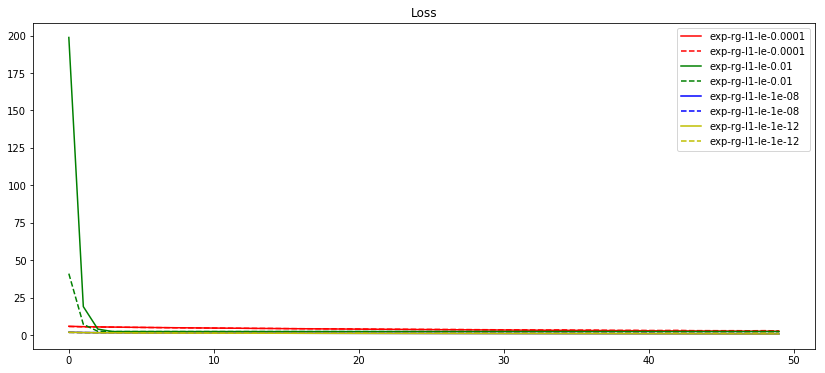

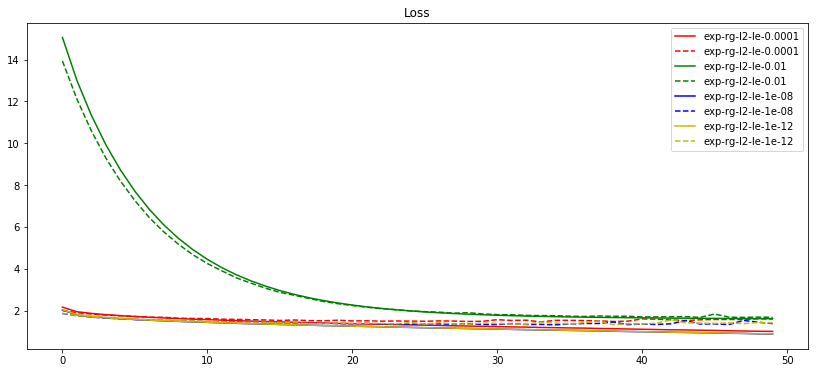

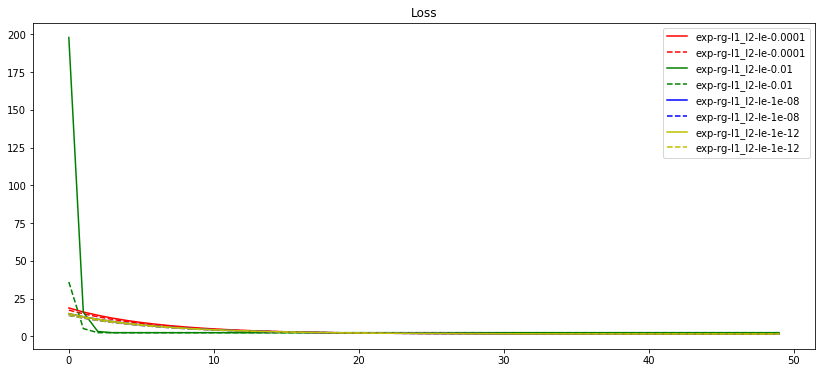

In [10]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]
keys = list(sorted(results.keys()))

plt.figure(figsize=(14,6))
for i, cond in enumerate([key for key in keys if ('rg-' + REG[0] + '-le') in key]):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(14,6))
for i, cond in enumerate([key for key in keys if ('rg-' + REG[1] + '-le') in key]):    
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(14,6))
for i, cond in enumerate([key for key in keys if ('rg-' + REG[2] + '-le') in key]):    
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

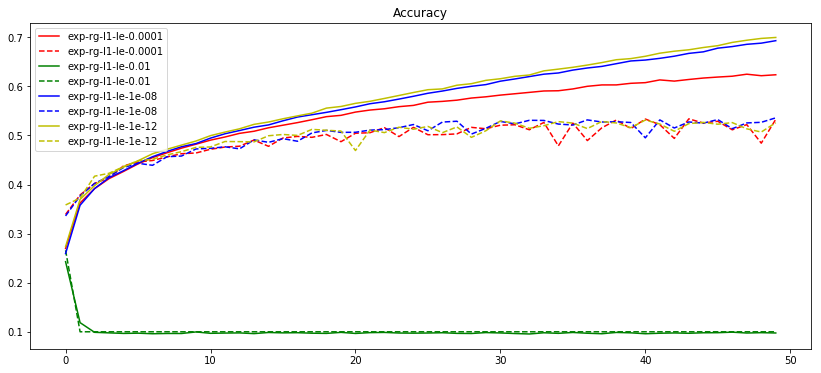

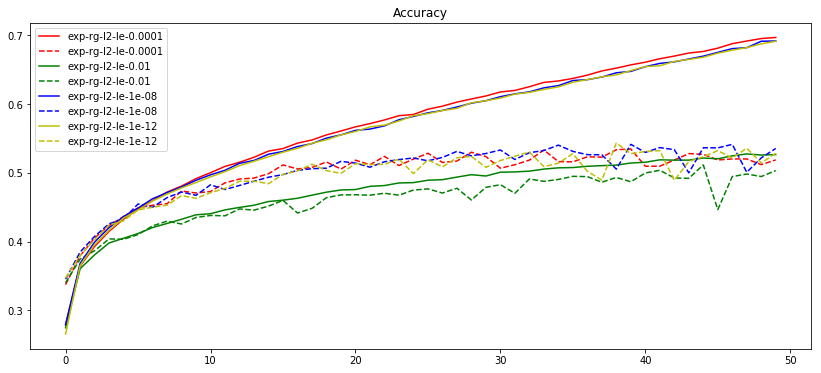

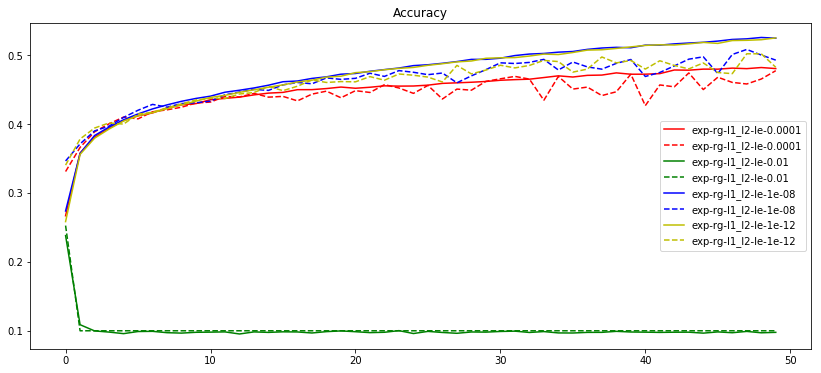

In [11]:
plt.figure(figsize=(14,6))
for i, cond in enumerate([key for key in keys if ('rg-' + REG[0] + '-le') in key]):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(14,6))
for i, cond in enumerate([key for key in keys if ('rg-' + REG[1] + '-le') in key]):    
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(14,6))
for i, cond in enumerate([key for key in keys if ('rg-' + REG[2] + '-le') in key]):    
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()